In [1]:
from photometry import Forced_Photometry
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import RectangularAperture, RectangularAnnulus,CircularAperture, CircularAnnulus
from photutils.aperture import ApertureStats, aperture_photometry

import pandas as pd

from astropy.coordinates import SkyCoord

import lightkurve as lk

%matplotlib widget

In [2]:
diff = np.load('/Users/zgl12/Modules/Kakapo/difference_arrays/diff_c6_t212602590.npy')

In [3]:
events = pd.read_csv('/Users/zgl12/Modules/Kakapo/detected_events/events_c6_t212602590.csv')

In [4]:
events

,cluster,frame_min,frame_max,time_min,time_max,x,y,xstd,ystd
0,0,1972.0,1980.0,2424.754980,2424.918433,4.420784,5.525036,0.011861,0.145331
1,1,2152.0,2191.0,2428.432680,2429.229515,4.417566,5.301049,0.018679,0.038615
2,2,2255.0,2273.0,2430.537141,2430.904911,4.426017,5.325739,0.016919,0.038596
3,3,2329.0,2379.0,2432.049084,2433.070667,4.420092,5.353366,0.012988,0.032357
4,4,2417.0,2448.0,2433.847069,2434.480451,4.411186,5.340475,0.011756,0.054012
5,5,2478.0,3857.0,2435.093400,2463.268743,4.420752,5.297816,0.024877,0.028002


0
4.420783888375421 5.5250362402117785


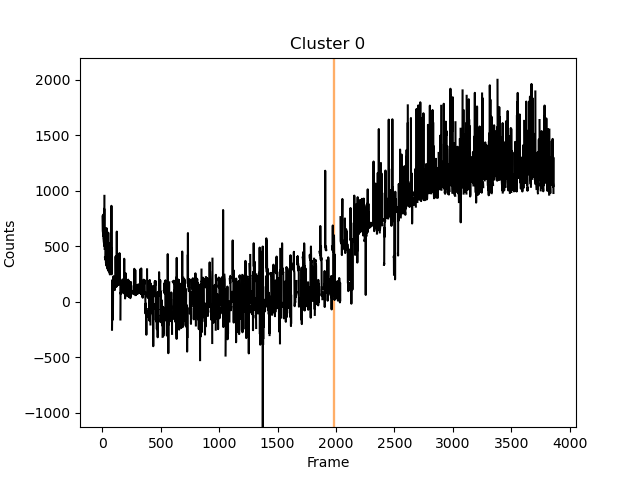

1
4.417566439162438 5.301048651218292


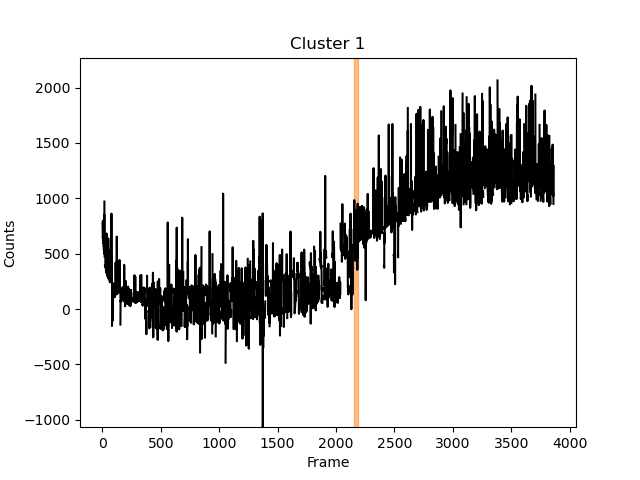

2
4.426016899513262 5.325739215013842


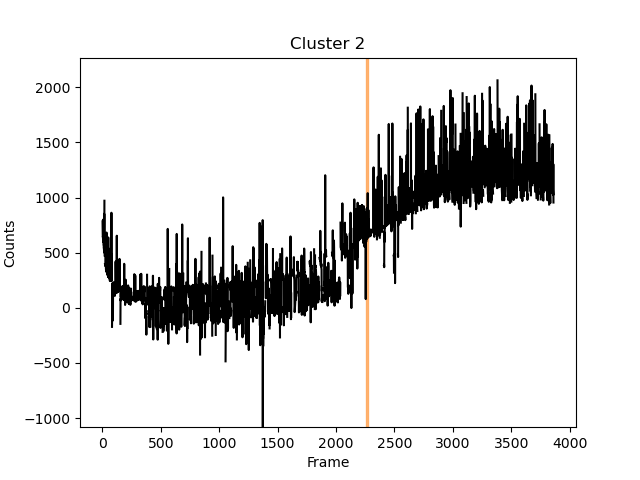

3
4.420092446590791 5.353366286897564


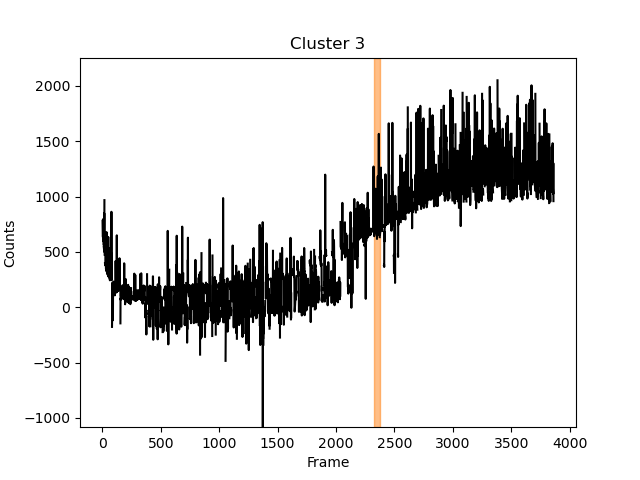

4
4.4111862370822585 5.340475287021039


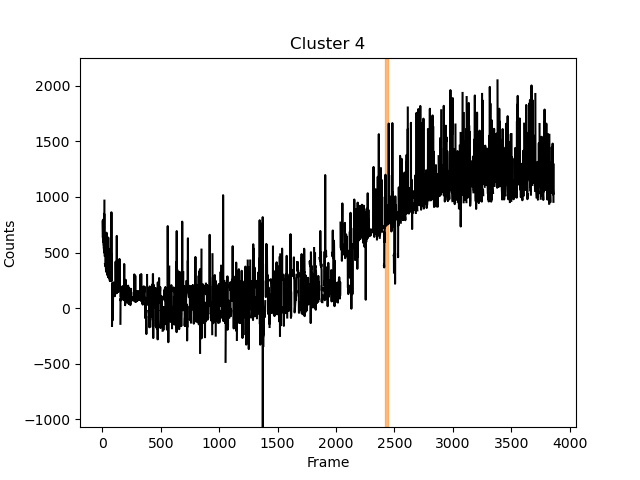

5
4.420752124261703 5.297815666780255


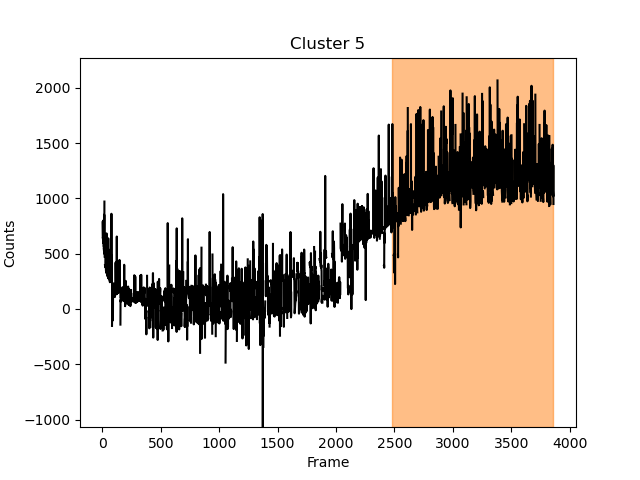

In [5]:
clu = events['cluster'].unique()

for c in clu:
    if c >= 0:
        print(c)
        clu_stars = events[events['cluster'] == c]
        
        x = clu_stars['x'].values[0]
        y = clu_stars['y'].values[0]
        
        print(x, y)
        
        fluxes = []
        
        for i in range(len(diff)):
            
            # pos = list(zip(x, y))
            if np.isnan(diff[i]).sum() > diff[i].shape[0] * diff[i].shape[1] * 0.5:
                fluxes.append(np.nan)
                continue
    
            aperture = CircularAperture([x, y], 2)
            
            phot_table = aperture_photometry(diff[i], aperture)
            phot_table = phot_table.to_pandas()
            flux = phot_table['aperture_sum'].values[0]
            fluxes.append(flux)
            # break
        
        plt.figure()
        plt.plot(fluxes, color = 'k')
        plt.fill_betweenx([np.nanmin(fluxes), 1.1 * np.nanmax(fluxes)], clu_stars['frame_min'], clu_stars['frame_max'], color='C1', alpha = 0.5)
        plt.title(f'Cluster {c}')
        plt.xlabel('Frame')
        plt.ylabel('Counts')
        plt.ylim(np.nanmin(fluxes), 1.1 * np.nanmax(fluxes))
        plt.show()
        
        # break
        
        
    


In [ ]:
diff[941]


plt.figure()
plt.imshow(diff[1884], cmap='viridis')
plt.scatter(4.065760073133121, 1.4605397212540965)
plt.show()

In [15]:
ra = 202.9625
dec = -10.736

c = SkyCoord(ra=ra,dec=dec,unit='deg')
res = lk.search_targetpixelfile(c, mission='K2', campaign = 6, radius = 1200)#[0].download()

tpf = res[0].download(quality_bitmask=0)

In [16]:
fluxes_plot = tpf.flux.value

In [ ]:
plt.figure()
plt.imshow(fluxes_plot[937] - fluxes_plot[967], cmap='viridis')
plt.scatter(4.096616019786621, 1.4537751339962681)
plt.show()

plt.figure()
plt.imshow(diff[941], cmap='viridis')
plt.scatter(4.065760073133121, 1.4605397212540965)
plt.show()

# plt.figure()
# plt.imshow(fluxes[862], cmap='viridis')
# plt.scatter(4.065760073133121, 1.4605397212540965)
# plt.show()

In [ ]:
fluxes()

In [ ]:
clu_stars

In [ ]:
stars